In [1]:
import pandas as pd
import re

# Read the dataset
df = pd.read_csv('data/BA_reviews.csv')

# Clean the reviews column
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [2]:
from gensim import corpora, models

# Tokenize the cleaned reviews
tokenized_reviews = [review.split() for review in df['cleaned_reviews']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Perform LDA topic modeling
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and top keywords
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic #{idx}: {topic}')

Topic #0: 0.053*"the" + 0.035*"and" + 0.032*"was" + 0.026*"a" + 0.024*"to" + 0.015*"of" + 0.014*"on" + 0.013*"i" + 0.012*"flight" + 0.012*"in"
Topic #1: 0.058*"the" + 0.037*"to" + 0.028*"and" + 0.022*"was" + 0.019*"a" + 0.017*"in" + 0.015*"we" + 0.013*"of" + 0.013*"flight" + 0.013*"on"
Topic #2: 0.040*"the" + 0.020*"to" + 0.016*"and" + 0.016*"of" + 0.013*"is" + 0.012*"a" + 0.010*"in" + 0.010*"with" + 0.010*"this" + 0.009*"ba"
Topic #3: 0.047*"to" + 0.039*"i" + 0.036*"the" + 0.028*"and" + 0.020*"a" + 0.018*"my" + 0.015*"they" + 0.014*"was" + 0.013*"flight" + 0.013*"for"
Topic #4: 0.032*"to" + 0.025*"i" + 0.022*"the" + 0.020*"a" + 0.016*"for" + 0.015*"and" + 0.013*"they" + 0.011*"is" + 0.011*"in" + 0.009*"was"


In [3]:
from textblob import TextBlob

# Calculate sentiment polarity for each review
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

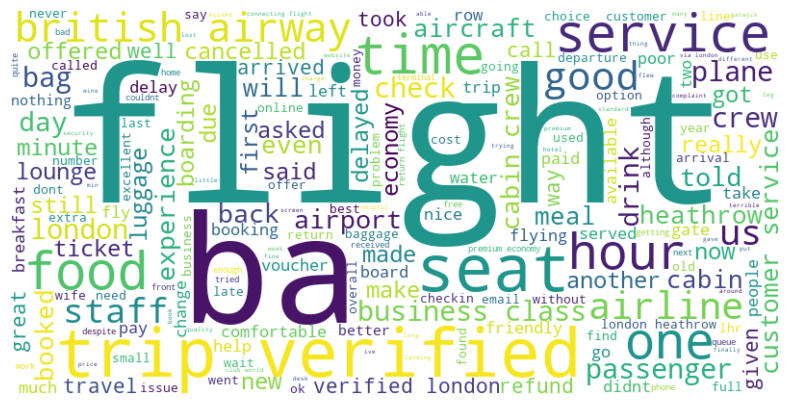

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all cleaned reviews
all_reviews = ' '.join(df['cleaned_reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()